In [ ]:
'''
Script calculating the a P3 value from single trials for each channel (or for GFP)
Generates a plot comparing the changes in amplitudes vs. in conditions over time
'''

In [98]:
import numpy as np
import os
import scipy.io as io
import matplotlib.pyplot as plt

def ms2time(ms1,ms2):
    time1 = round(ms1/7.8125)+1;
    time2 = round(ms2/7.8125)+1;
    return list(range(time1, time2))

def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

def find_outliers(data):
    data_mean, data_std = np.mean(data), np.std(data)
    cut_off = data_std * 3
    lower, upper = data_mean - cut_off, data_mean + cut_off
    outliers = [x for x in range(len(data)) if data[x] < lower or data[x] > upper]
    return outliers


In [2]:
directory_ ='/Users/seydanur/my-python/data/'
subjectData = io.loadmat(directory_+'1106.mat')
conds = subjectData['evConds']
events = subjectData['events']
ERPs = subjectData['ERPs']
preStim= subjectData['preStim']

(160, 122, 6313)

In [4]:
baseline= np.mean(preStim,1)
ERPs_nobase=np.zeros((122,160,ERPs.shape[2]),dtype=object)
for t in range(122):
    ERPs_nobase[t]=np.take(ERPs, t, axis=1)-baseline
ERPs=ERPs_nobase.reshape(160,122,ERPs.shape[2])

In [5]:
targetcodes=[13,16,23,26,33,36,43,46]
ind_target = [] 
for i in range(0, len(events[0])) : 
    if events[0,i] in targetcodes : 
        ind_target.append(i) 

In [ ]:
ERPs=np.array(ERPs, dtype=np.float64)
targERPs=np.take(ERPs,ind_target,axis=2)

In [14]:
n_targ=targERPs.shape[2]
targConds=np.take(conds,ind_target,axis=1)

In [185]:
inds=np.array(range(n_targ)) # inds=np.array(range(n_targ-500,n_targ)) #take last 500 target trials 
Cs=np.take(targConds,inds)
V=np.take(targERPs,inds,axis=2)
GFP=np.std(V, axis=0)

In [186]:
ch=19
P3win=ms2time(230,530)
V=np.mean(np.take(V[ch],P3win , axis=0),axis=0)
#V2=np.mean(np.take(GFP, P3win, axis=0),axis=0)
#V3=np.amax(np.take(GFP, P3win, axis=0),axis=0)
#V4=np.amax(np.take(V[ch], P3win, axis=0),axis=0)
V=np.delete(V,find_outliers(V))


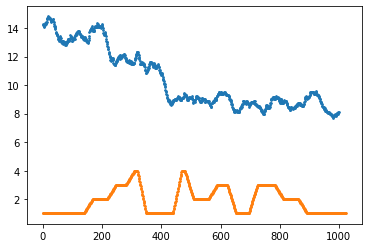

In [187]:
winSize=30
dotSize=len(y)/300
plt.rcParams["figure.figsize"] = [20,10]
y=moving_average(S19mn,n=winSize)
plt.scatter(range(len(y)),y,dotSize)
yC=moving_average(Cs,n=winSize)
plt.scatter(range(len(yC)),yC,dotSize)